In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Loading in the Shopping Behavior Dataset as df and Shopping Trends Dataset as df1

Our next step is to see if there are any duplicates. 

then I want to combine the two datasets together one for useablility and to make the cleaning easier

In [23]:
#using pandas to read csv
df = pd.read_csv('../Data/shopping_behavior_updated.csv')

In [25]:
#showing first 5 rows of this dataset
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [21]:
#again using pandas to read csv
df1 = pd.read_csv('../Data/shopping_trends.csv')

In [26]:
#showing first 5 rows of this dataset
df1.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


OK so we have both datasets loaded in lets work on the duplicates if there are any

In [27]:
df = df.drop_duplicates()
df1 = df1.drop_duplicates() 

There were no duplicates in both datasets

In [38]:
# Ensuring 'Preferred Payment Method' from shopping_trends_df_cleaned is included in the combined dataset
combined_df = pd.merge(df, df1, 
                       on=df.columns.intersection(df1.columns).tolist(), 
                       how='outer')

# Filling empty 'Preferred Payment Method' values with "Did Not Answer"
combined_df['Preferred Payment Method'] = combined_df['Preferred Payment Method'].fillna("Did Not Answer")

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7183 entries, 0 to 7182
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               7183 non-null   int64  
 1   Age                       7183 non-null   int64  
 2   Gender                    7183 non-null   object 
 3   Item Purchased            7183 non-null   object 
 4   Category                  7183 non-null   object 
 5   Purchase Amount (USD)     7183 non-null   int64  
 6   Location                  7183 non-null   object 
 7   Size                      7183 non-null   object 
 8   Color                     7183 non-null   object 
 9   Season                    7183 non-null   object 
 10  Review Rating             7183 non-null   float64
 11  Subscription Status       7183 non-null   object 
 12  Shipping Type             7183 non-null   object 
 13  Discount Applied          7183 non-null   object 
 14  Promo Co

In [42]:
combined_df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Payment Method              0
Frequency of Purchases      0
Preferred Payment Method    0
dtype: int64

In [37]:
combined_df = combined_df.drop_duplicates()
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7183 entries, 0 to 7182
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               7183 non-null   int64  
 1   Age                       7183 non-null   int64  
 2   Gender                    7183 non-null   object 
 3   Item Purchased            7183 non-null   object 
 4   Category                  7183 non-null   object 
 5   Purchase Amount (USD)     7183 non-null   int64  
 6   Location                  7183 non-null   object 
 7   Size                      7183 non-null   object 
 8   Color                     7183 non-null   object 
 9   Season                    7183 non-null   object 
 10  Review Rating             7183 non-null   float64
 11  Subscription Status       7183 non-null   object 
 12  Shipping Type             7183 non-null   object 
 13  Discount Applied          7183 non-null   object 
 14  Promo Co

- We have no null values.
- we've combined the data in a way that makes it easier to work with.
- We have no duplicate values.
- Filled empty 'Preferred Payment Method' values with "Did Not Answer" 

In [39]:
#saving the combined dataset
combined_df.to_csv('../Data/combined.csv')

In [45]:
combined_df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,7183.000000,7183.000000,7183.000000,7183.000000,7183.000000
mean,1953.031324,44.086593,59.794793,3.749227,25.374495
std,1126.819735,15.209830,23.685625,0.716035,14.426002
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,979.000000,31.000000,39.000000,3.100000,13.000000
50%,1951.000000,44.000000,60.000000,3.700000,25.000000
75%,2930.500000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


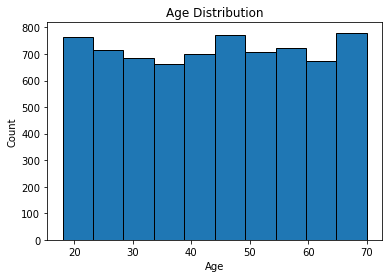

In [49]:
plt.hist(combined_df['Age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

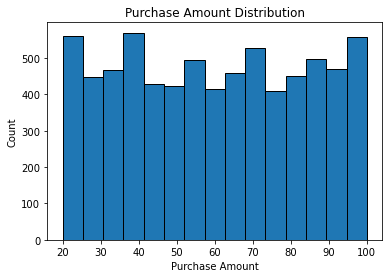

In [56]:
plt.hist(combined_df['Purchase Amount (USD)'], bins=15, edgecolor='black')
plt.xlabel('Purchase Amount')
plt.ylabel('Count')
plt.title('Purchase Amount Distribution')
plt.show()

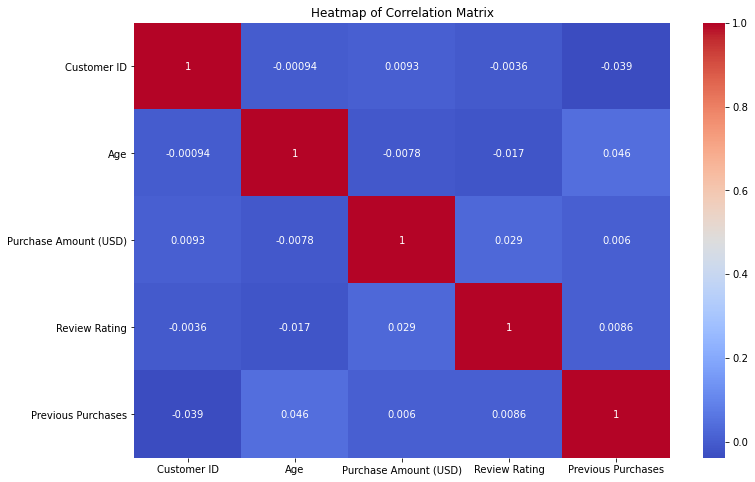

In [57]:
# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Use a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()
